Catergory 1 : White Kernel 
- Best is White Kernel Min Max error:
- Laplacian and Matern Kernels

Category 2 : Single Point estimate Maximising Log Likelihood inbuilt :
- Kernels Laplacian and Metrn Kernels

Category 3: Single Params Estimate: 
- Best is Peak Params :
- ExpSineSquared and Matern Kernels

Category 4: MCMC Averaging (Ideal but not realistic)
- Matern Kernel

7 models that I can plot the errors for and also the difference between each

In [79]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as math

In [80]:
columns = ['Rational Quadratic', 'ExpSineSquared', 'Laplacian', 'RBF','Matern']
rows = ["RMSE", "MAE", "R²", "Adjusted R²", "Figure of Merit","Pearson Coefficient"]
mcmc = pd.read_csv("MCMCaveraged.csv", names=columns)
peakparams = pd.read_csv("peakparams.csv",names=columns)
pointestimates = pd.read_csv("pointestimates.csv",names=columns)
whitekernelerrorminmax = pd.read_csv("WhiteKernelwitherrorminmax.csv",names=columns)
whitekernelmeanerror = pd.read_csv("WhiteKernelwitherrormean.csv",names=columns)

In [81]:
MCMCMatern = mcmc['Matern']
WhiteminmaxLaplacian = whitekernelerrorminmax['Laplacian']
WhiteminmaxMatern = whitekernelerrorminmax['Matern']
WhitemeanerrorMatern = whitekernelmeanerror['Matern']
WhitemeanerrorLaplacian = whitekernelmeanerror['Laplacian']

pointestimateLaplacian = pointestimates['Laplacian']
pointestimatesMatern = pointestimates['Matern']
peakparamsMatern = peakparams['Matern']
peakparamsExpSineSquared = peakparams['ExpSineSquared']
models = [MCMCMatern, WhiteminmaxLaplacian, WhiteminmaxMatern,WhitemeanerrorLaplacian,WhitemeanerrorMatern, pointestimateLaplacian, pointestimatesMatern, peakparamsMatern, peakparamsExpSineSquared]
model_names = ["MCMC Matern", "Min-Max Laplacian", "Min-Max Matern","Mean Laplacian","Mean Matern","LL Laplacian", "LL Matern", "Peak Matern", "Peak ExpSineSquared"]


In [82]:
print(MCMCMatern)

0    0.147461
1    0.105991
2    0.727540
3    0.703321
4    1.623243
5    0.872004
Name: Matern, dtype: float64


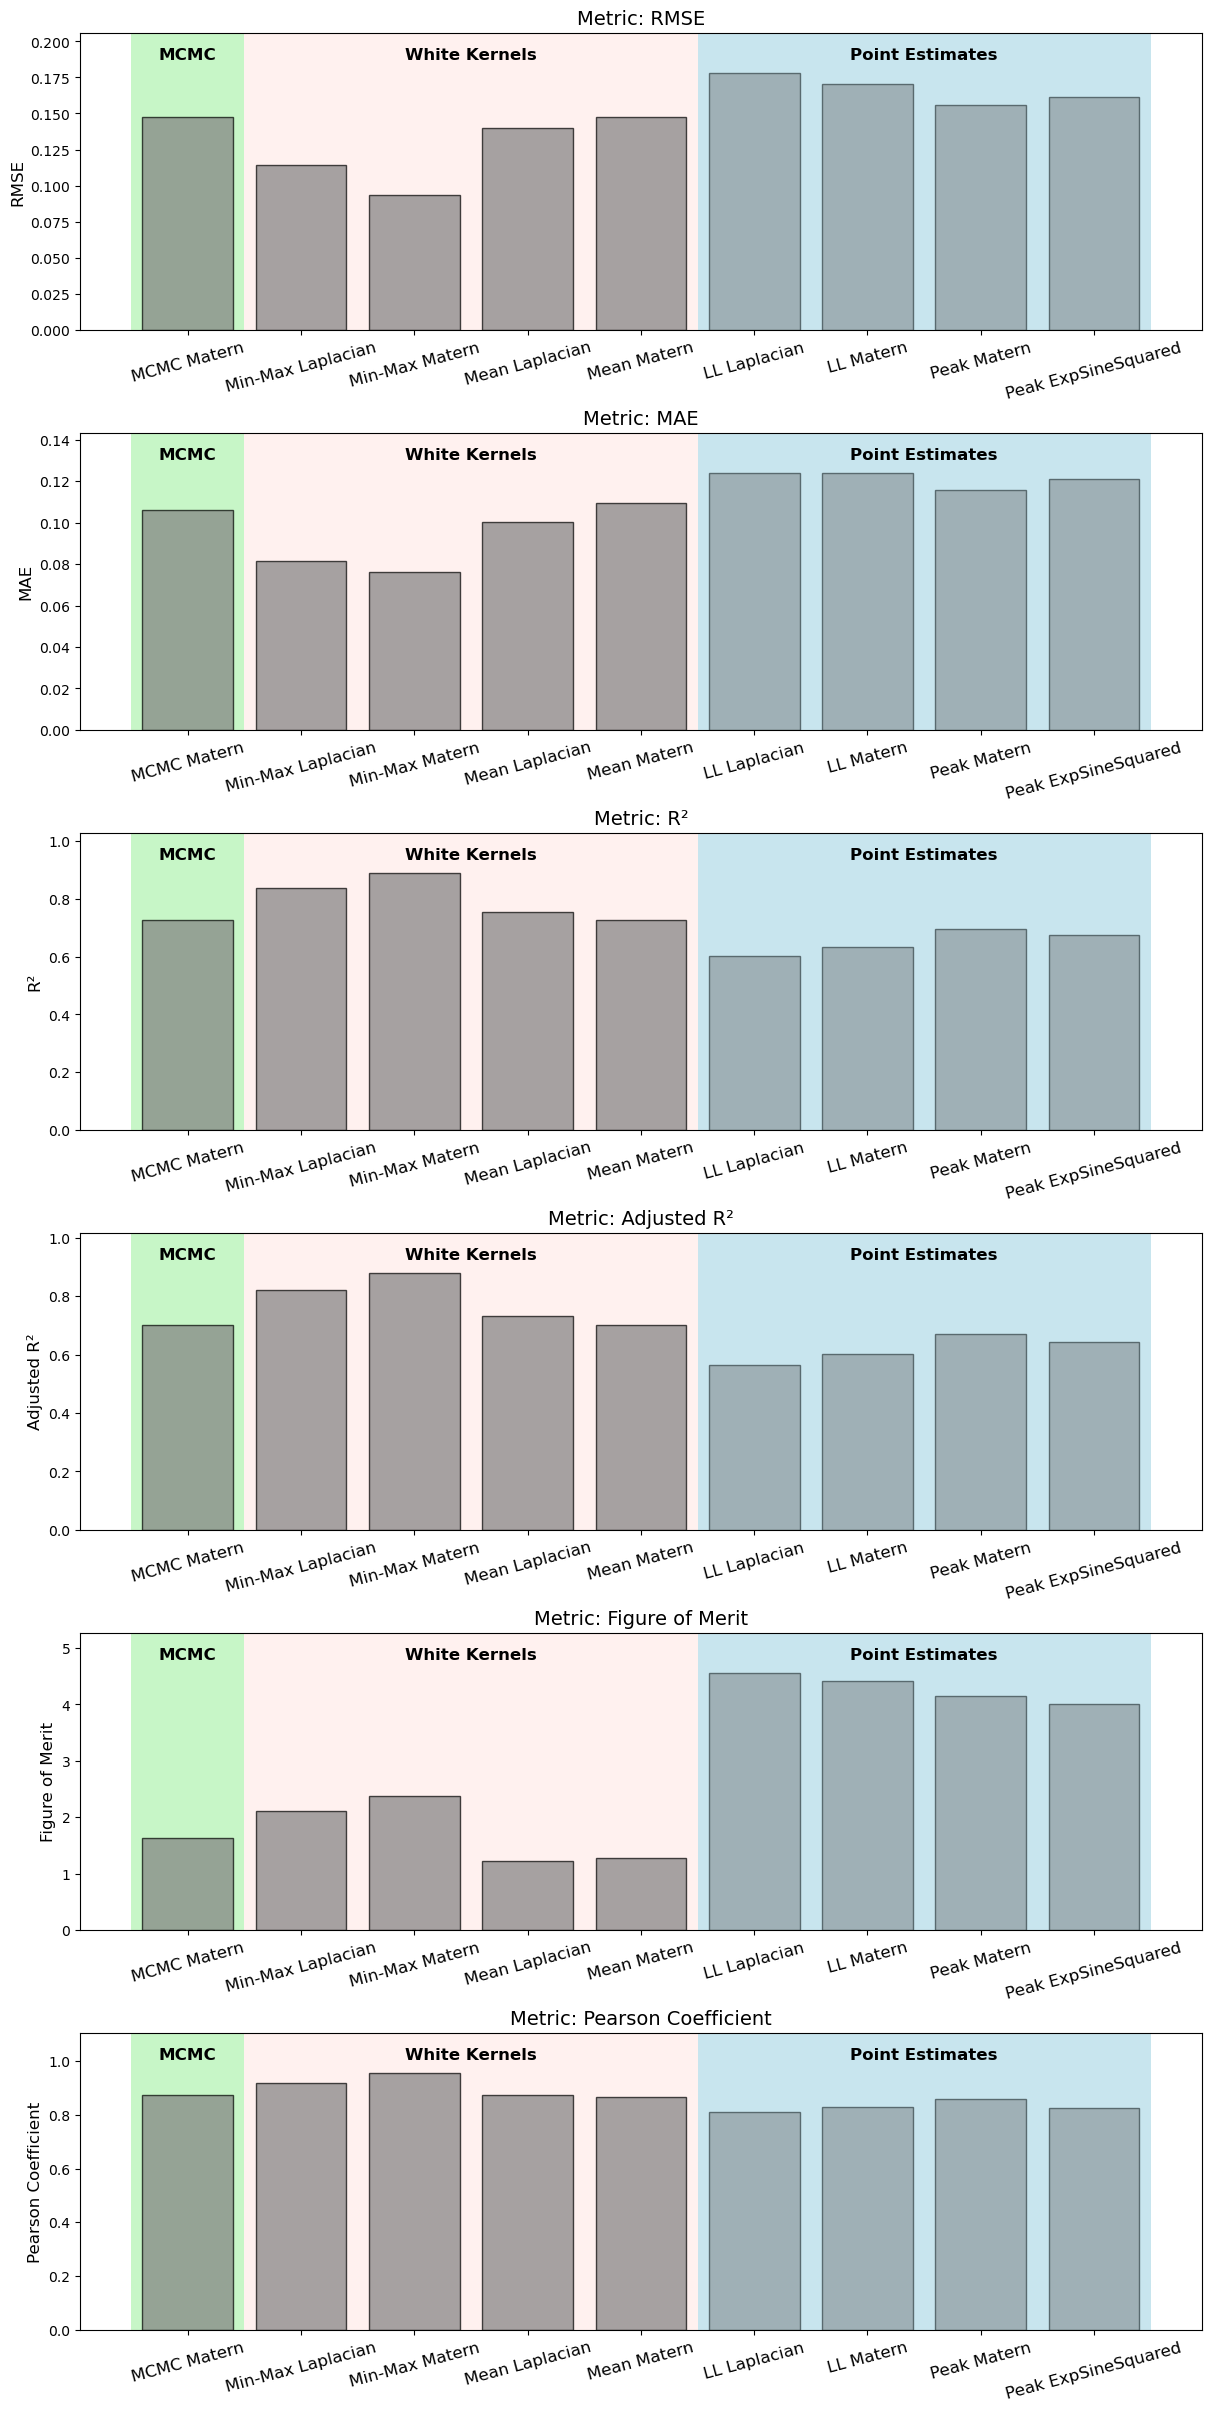

In [83]:
fig, axes = plt.subplots(nrows=len(rows), ncols=1, figsize=(12, len(rows)*4), constrained_layout=True)

# Colors: [Reference, Cluster 1, Cluster 2]
cluster_colors = ['#c7f9cc', '#ffddd2', '#caf0f8']  # light green, pink, blue

for i, row in enumerate(rows):
    # Background shading
    axes[i].axvspan(-0.5, 0.5, facecolor='lightgreen', alpha=0.5, label='MCMC Averaging')
    axes[i].axvspan(0.5, 4.5, facecolor='mistyrose', alpha=0.5, label='White Kernels')
    axes[i].axvspan(4.5, 8.5, facecolor='lightblue', alpha=0.5, label='Point Estimates')

    # Plotting each model's metric as bars
    for j, model in enumerate(models):
        axes[i].bar(x[j], model.iloc[i], color='grey', alpha=0.7, edgecolor='black')

    ylim_max = axes[i].get_ylim()[1]
    axes[i].set_ylim(0, ylim_max * 1.1)
    label_height = ylim_max   # slightly above the max y-value
    axes[i].text(0, label_height, 'MCMC', ha='center', fontsize=12, fontweight='bold')
    axes[i].text(2.5, label_height, 'White Kernels', ha='center', fontsize=12,fontweight='bold')
    axes[i].text(6.5, label_height, 'Point Estimates', fontsize=12, ha='center',fontweight='bold')

    # X-axis labels and styling
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(model_names, rotation=15, fontsize=12)
    axes[i].set_ylabel(f'{rows[i]}', fontsize=12)
    axes[i].set_title(f'Comparison for {rows[i]}', fontsize=14, fontweight='bold')

    # Background for Cluster 2
    axes[i].axvspan(4.5, 8.5, facecolor='lightblue', alpha=0.3, label='Cluster 2')

    # Titles
    axes[i].set_title(f'Metric: {rows[i]}', fontsize=14)

plt.show()

### Show that the means are similar
### Then pick Min Max Matern, justify LL Matern as it doesn't require MCMC. Hopefully the mean predictions are fairly similar and can justify its an ok replacement

## We notice a cluster almost forms of similar models. The Kernels have less of an effect than the model themselves and so we deal with each individual cluster and pick the best from this

### Next step is get the outputs of the White Kernel Models and the Point Estimate Models, Show that hopefully the mean prediction for these is not a mile off of each other and so then we have the point estimate model and the white kernel min max which provides better results and so we choose that model. Then say ideally we would like to choose the MCMC averaging model as this is the one that provides the best outputs but this is not pheasible